**Author: Alba Alfath Millentry**

**Import Library**

In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import sklearn.cluster as cluster

In [ ]:
# install library
!pip install scikit-plot

**Read Data**

In [ ]:
# import graph library
import matplotlib.pyplot as plt
import scikitplot as skplt

In [ ]:
#mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/MyDrive/Assigment_25'

/content/drive/MyDrive/Assigment_25


In [ ]:
!ls

'(Alba Alfath Millentry) - Assignment Day 25.ipynb'   water_potability.csv


In [ ]:
water_potability = pd.read_csv('water_potability.csv')

In [ ]:
water_potability

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#target data
water_potability_target_data = water_potability['Potability']

In [ ]:
water_potability_target_data

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
#value data
water_potability_value_data = water_potability.drop(water_potability['Potability'])

In [ ]:
water_potability_value_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**EDA**

In [ ]:
# merge value data and target data - check data type and shape
print('data type value:',type(water_potability_value_data))
print('shape value:',water_potability_value_data.shape)
print('\n')
print('data type target:',type(water_potability_target_data))
print('shape target:',water_potability_target_data.shape)

data type value: <class 'pandas.core.frame.DataFrame'>
shape value: (3274, 10)


data type target: <class 'pandas.core.series.Series'>
shape target: (3276,)


In [ ]:
# assign variable for column in numeric type
numeric_column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                  'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

In [ ]:
water_potability[numeric_column].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
water_potability[water_potability.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


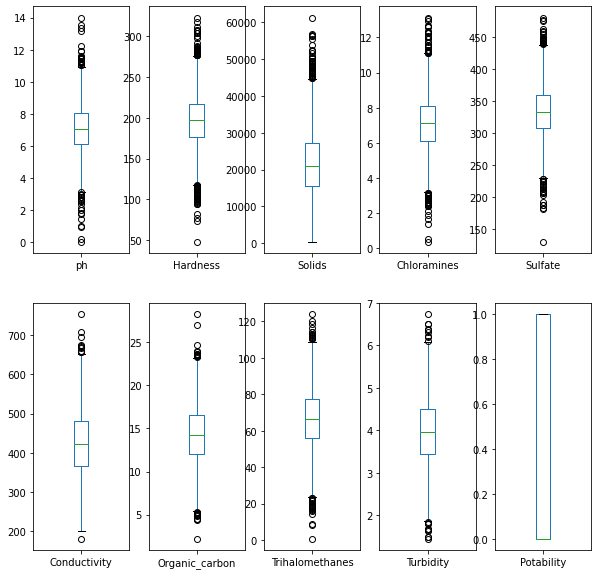

In [ ]:
# check outlier using boxplot
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10,10))

for i,el in enumerate(numeric_column):
    a = water_potability.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

In [ ]:
# get IQR for each numeric column
Q1 = water_potability[numeric_column].quantile(0.25)
Q3 = water_potability[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 ph                     6.093092
Hardness             176.850538
Solids             15666.690297
Chloramines            6.127421
Sulfate              307.699498
Conductivity         365.734414
Organic_carbon        12.065801
Trihalomethanes       55.844536
Turbidity              3.439711
Potability             0.000000
Name: 0.25, dtype: float64

Q3:
 ph                     8.062066
Hardness             216.667456
Solids             27332.762127
Chloramines            8.114887
Sulfate              359.950170
Conductivity         481.792304
Organic_carbon        16.557652
Trihalomethanes       77.337473
Turbidity              4.500320
Potability             1.000000
Name: 0.75, dtype: float64

IQR:
 ph                     1.968974
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609


In [ ]:
# remove outlier
non_outlier_df = water_potability.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [ ]:
non_outlier_df.shape

(2951, 10)

In [ ]:
final_feature_column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                  'Organic_carbon', 'Trihalomethanes', 'Turbidity',]
target_column = ['Potability']
final_column = final_feature_column + target_column

In [ ]:
# standardize the data
scaler = preprocessing.StandardScaler()
final_df = non_outlier_df[final_column].copy()
final_df = pd.DataFrame(scaler.fit_transform(final_df[final_feature_column]),columns=final_feature_column)
final_df['Potability'] = non_outlier_df['Potability'].to_numpy()

In [ ]:
final_df.shape

(2951, 10)

**Handle Missing Data**

In [ ]:
# handle missing data - replace values with mean - multiple column - string column
replaced_value_final_df = final_df.copy()
replaced_value_final_df.fillna(method='bfill',axis=0,inplace=True)
replaced_value_final_df['Sulfate'].fillna(1,axis=0,inplace=True)
replaced_value_final_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-2.326195,0.286133,-0.099843,0.126246,0.908121,1.732275,-1.228286,1.321117,-1.322763,0
1,-2.326195,-2.290404,-0.367348,-0.336283,0.601194,2.089019,0.269202,-0.648049,0.698732,0
2,0.710302,0.946619,-0.208983,1.500457,0.601194,-0.086634,0.795988,0.000015,-1.200754,0
3,0.861081,0.609891,0.052038,0.654264,0.601194,-0.777480,1.285109,2.178525,0.867173,0
4,1.398304,-0.526045,-0.447932,-0.397942,-0.632559,-0.338748,-0.860640,-2.210639,0.139189,0
...,...,...,...,...,...,...,...,...,...,...
2946,-0.695706,-0.336305,0.562025,0.437397,0.305996,-0.120580,-0.701746,-0.385327,-0.393774,1
2947,0.509209,-0.100931,-0.528283,0.655676,1.000000,-0.413166,1.742664,0.219995,-1.539559,1
2948,1.625043,-0.708319,1.430510,0.161039,1.000000,0.081129,-1.022614,0.219995,-0.881340,1
2949,-1.348899,1.164011,-1.189962,-0.567134,1.000000,-0.282917,-0.982097,0.710832,0.972208,1


In [ ]:
replaced_value_final_df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-2.326195,0.286133,-0.099843,0.126246,0.908121,1.732275,-1.228286,1.321117,-1.322763,0
1,-2.326195,-2.290404,-0.367348,-0.336283,0.601194,2.089019,0.269202,-0.648049,0.698732,0
2,0.710302,0.946619,-0.208983,1.500457,0.601194,-0.086634,0.795988,0.000015,-1.200754,0
3,0.861081,0.609891,0.052038,0.654264,0.601194,-0.777480,1.285109,2.178525,0.867173,0
4,1.398304,-0.526045,-0.447932,-0.397942,-0.632559,-0.338748,-0.860640,-2.210639,0.139189,0
5,-1.032073,-0.279826,0.885059,0.296421,-0.195996,-1.811114,-1.845986,-0.738680,-1.853179,0
6,2.182284,1.760386,0.885186,0.274538,1.571754,-1.771370,-0.164524,1.167793,-1.704240,0
7,1.082136,0.233934,-0.981007,-1.777661,-0.812698,0.612473,-0.609344,-0.232583,0.568265,0
8,0.198693,-2.646643,-0.905073,0.476785,-1.727458,-0.451541,-0.502580,-0.802197,-0.491980,0
9,0.198693,-1.057986,1.343503,0.300477,-0.197421,-0.002029,0.396107,0.791225,-0.403529,0


In [ ]:
# prepare the data to numpy array
final_feature_array = replaced_value_final_df[final_feature_column].to_numpy()
target_array = replaced_value_final_df[target_column].to_numpy()

In [ ]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (2951, 9)
shape of target: (2951, 1)


**PCA**

In [ ]:
# load the algorithm
pca_model = decomposition.PCA(n_components=2)

In [ ]:
# train the data and transform
pca_feature_array = pca_model.fit_transform(final_feature_array)

In [ ]:
# check the shape of the result
pca_feature_array.shape

(2951, 2)

In [ ]:
# add new name for the new column
pca_column = ['PCA Column 1','PCA Column 2']

In [ ]:
# transform to dataframe
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['Potability'] = target_array

In [ ]:
# check the resulted data
pca_feature_df.head(5)

,PCA Column 1,PCA Column 2,Potability
0,-0.667457,-1.287421,0
1,-2.283704,-1.780675,0
2,1.687734,-0.229934,0
3,1.185989,-0.211839,0
4,0.249341,0.613356,0


In [ ]:
# check the explained variance
print('explained variance:',pca_model.explained_variance_ratio_)

explained variance: [0.13016619 0.12656036]


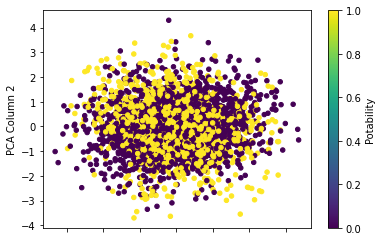

In [ ]:
# show in 2D plot
pca_feature_df.plot.scatter(x='PCA Column 1',y='PCA Column 2',c='Potability',colormap='viridis')

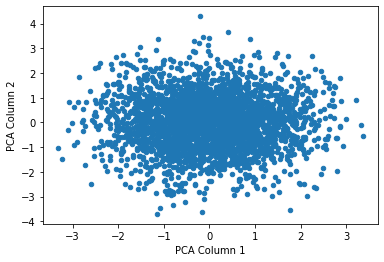

In [ ]:
# show in 2D plot
pca_feature_df.plot.scatter(x='PCA Column 1',y='PCA Column 2')

In [ ]:
# check explained variance for each number of component
for x in range(1,len(final_feature_column)+1):
  pca_model_x = decomposition.PCA(n_components=x)
  pca_feature_array_x = pca_model_x.fit_transform(final_feature_array)
  print('explained variance for {} column: {}'.format(x,np.sum(pca_model_x.explained_variance_ratio_)))

explained variance for 1 column: 0.13016618673839933
explained variance for 2 column: 0.25672654911598936
explained variance for 3 column: 0.3724915257675281
explained variance for 4 column: 0.4868834294842943
explained variance for 5 column: 0.5985116137696751
explained variance for 6 column: 0.7049380324664987
explained variance for 7 column: 0.8102488794284296
explained variance for 8 column: 0.9078739155672377
explained variance for 9 column: 1.0


**Clustering**

In [ ]:
# load the algorithm
cluster_model = cluster.KMeans(n_clusters=2)

In [ ]:
# train the data
cluster_array = cluster_model.fit(final_feature_array)

In [ ]:
# label result
cluster_label = cluster_model.labels_

In [ ]:
cluster_label

array([1, 1, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
# add label to final dataframe
final_df['Cluster'] = cluster_label

In [ ]:
# check the resulted data
final_df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Cluster
0,NaN,0.286133,-0.099843,0.126246,0.908121,1.732275,-1.228286,1.321117,-1.322763,0,1
1,-2.326195,-2.290404,-0.367348,-0.336283,NaN,2.089019,0.269202,-0.648049,0.698732,0,1
2,0.710302,0.946619,-0.208983,1.500457,NaN,-0.086634,0.795988,0.000015,-1.200754,0,0
3,0.861081,0.609891,0.052038,0.654264,0.601194,-0.777480,1.285109,2.178525,0.867173,0,0
4,1.398304,-0.526045,-0.447932,-0.397942,-0.632559,-0.338748,-0.860640,-2.210639,0.139189,0,0
5,-1.032073,-0.279826,0.885059,0.296421,-0.195996,-1.811114,-1.845986,-0.738680,-1.853179,0,1
6,2.182284,1.760386,0.885186,0.274538,1.571754,-1.771370,-0.164524,1.167793,-1.704240,0,0
7,1.082136,0.233934,-0.981007,-1.777661,-0.812698,0.612473,-0.609344,-0.232583,0.568265,0,0
8,NaN,-2.646643,-0.905073,0.476785,-1.727458,-0.451541,-0.502580,-0.802197,-0.491980,0,1
9,0.198693,-1.057986,1.343503,0.300477,-0.197421,-0.002029,0.396107,0.791225,-0.403529,0,1


In [ ]:
# handle missing data - replace values with mean - multiple column - string column
replaced_value_final_df = final_df.copy()
replaced_value_final_df.fillna(method='bfill',axis=0,inplace=True)
replaced_value_final_df['Sulfate'].fillna(1,axis=0,inplace=True)
replaced_value_final_df['ph'].fillna(1,axis=0,inplace=True)
replaced_value_final_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Cluster
0,-2.326195,0.286133,-0.099843,0.126246,0.908121,1.732275,-1.228286,1.321117,-1.322763,0,1
1,-2.326195,-2.290404,-0.367348,-0.336283,0.601194,2.089019,0.269202,-0.648049,0.698732,0,1
2,0.710302,0.946619,-0.208983,1.500457,0.601194,-0.086634,0.795988,0.000015,-1.200754,0,0
3,0.861081,0.609891,0.052038,0.654264,0.601194,-0.777480,1.285109,2.178525,0.867173,0,0
4,1.398304,-0.526045,-0.447932,-0.397942,-0.632559,-0.338748,-0.860640,-2.210639,0.139189,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2946,-0.695706,-0.336305,0.562025,0.437397,0.305996,-0.120580,-0.701746,-0.385327,-0.393774,1,1
2947,0.509209,-0.100931,-0.528283,0.655676,1.000000,-0.413166,1.742664,0.219995,-1.539559,1,0
2948,1.625043,-0.708319,1.430510,0.161039,1.000000,0.081129,-1.022614,0.219995,-0.881340,1,1
2949,-1.348899,1.164011,-1.189962,-0.567134,1.000000,-0.282917,-0.982097,0.710832,0.972208,1,0


In [ ]:
# check using elbow method to define the best cluster [numbers]
for x in range(1, 30):
  cluster_model = cluster.KMeans(n_clusters=x)
  cluster_array = cluster_model.fit(final_feature_array)
  print(cluster_model.inertia_)

26576.990978482136
24334.702401198883
22818.595710429152
21702.27663080816
20811.90116561047
20079.53450250409
19462.968453459158
18924.636322171216
18459.771362411855
17971.62841344649
17616.302712890094
17290.637256091428
16968.296094347646
16691.60220913863
16404.189339646815
16128.88542694797
15832.348906662497
15691.186101846957
15458.55049440642
15324.996738810363
15102.630288641989
14927.021404736628
14797.051812417718
14652.298867489004
14469.50377504536
14331.678850871316
14255.904086819346
14101.530543924137
13965.63568042982


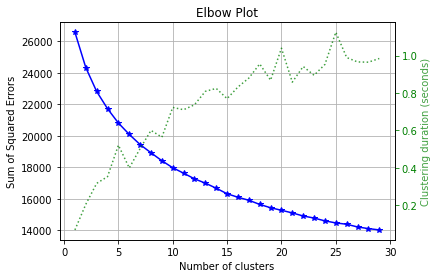

In [ ]:
# check using elbow method to define the best cluster [graph]
skplt.cluster.plot_elbow_curve(cluster_model, final_feature_array, cluster_ranges=range(1, 30))
plt.show()

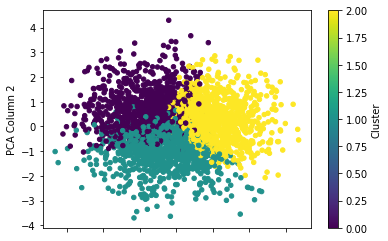

In [ ]:
# plot using PCA using the best cluster
best_cluster_model = cluster.KMeans(n_clusters=3)
best_cluster_array = best_cluster_model.fit(final_feature_array)
best_cluster_label = best_cluster_model.labels_
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)
pca_feature_df['Cluster'] = best_cluster_label
pca_feature_df.plot.scatter(x='PCA Column 1',y='PCA Column 2',c='Cluster',colormap='viridis')